In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [38]:
project = pd.read_csv("Mall Customers.txt")
project

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
project.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [40]:
project.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
project.drop(columns='Gender',axis=1,inplace=True)
project

,CustomerID,Age,Annual Income,Spending Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [51]:
model=KMeans(n_clusters=3)

In [52]:
labels=model.fit_predict(project)
warnings.filterwarnings('ignore')

In [53]:
project['clusters']=model.labels_


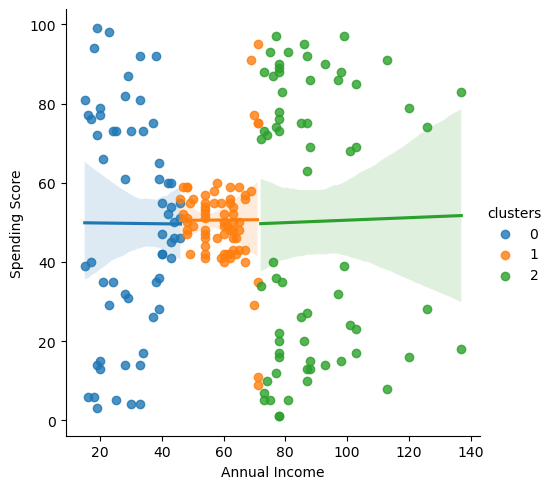

In [55]:
sns.lmplot(x='Annual Income',y='Spending Score',data=project,hue='clusters');


In [56]:
model=KMeans(n_clusters=4)

In [57]:
labels=model.fit_predict(project)

In [58]:
project['clusters']=model.labels_

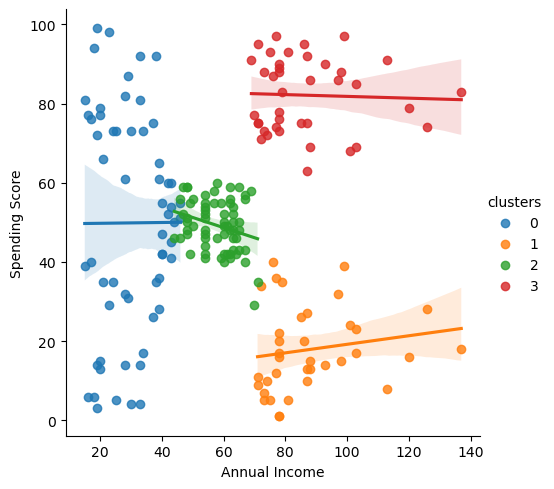

In [59]:
sns.lmplot(x='Annual Income',y='Spending Score',data=project,hue='clusters');

In [48]:
wcss=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(project)
    wcss.append(kmeans.inertia_)
wcss

[975591.5349999999,
 387062.3192319232,
 271336.3342233668,
 195360.6671012603,
 157142.45683760685,
 122604.31758163327,
 103201.4562049062,
 86021.72201687202,
 77417.9282477026,
 68939.51697375851]

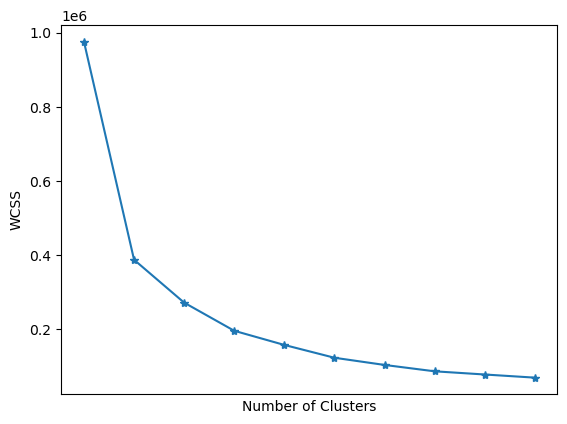

In [50]:
plt.plot(range(1,11), wcss, marker='*')
plt.xticks(range(10,0))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()